# Random Walks and the Diffusion Equation

This notebook covers topics on the diffusion equation:
* Random walks and connectivity
* Random coin flips
* Drunkard's walk
* Random diffusion walks (random step size, random direction)

In [1]:
%load_ext base16_mplrc
%base16_mplrc dark bespin

Loading extensions from ~/.ipython/extensions is deprecated. We recommend managing extensions like any other Python packages, in site-packages.
Setting plotting theme to bespin-dark. Palette available in b16_colors


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from pprint import pprint
%matplotlib inline

In [3]:
from seaborn import xkcd_palette as xkcd
blue, red, orange = xkcd(['denim blue','brick red','burnt orange'])
cmap_2d = 'BuPu_r'

In [4]:
np.random.seed(1729)

In [5]:
def DiffusionWalk(N, d):
    """
    Use random.normal(loc=mean, scale=stdev, shape) to generate an array 
    of normally distributed  steps of shape (N,d),
    and then use cumsum(..., axis=0) (which adds them up along the 'N' axis).
    """
    #steps = np.random.uniform(-0.5,0.5,(N,d))
    steps = np.random.normal(loc=0, scale=1, size=(N,d))
    walks = np.cumsum(steps, axis=0)
    return walks

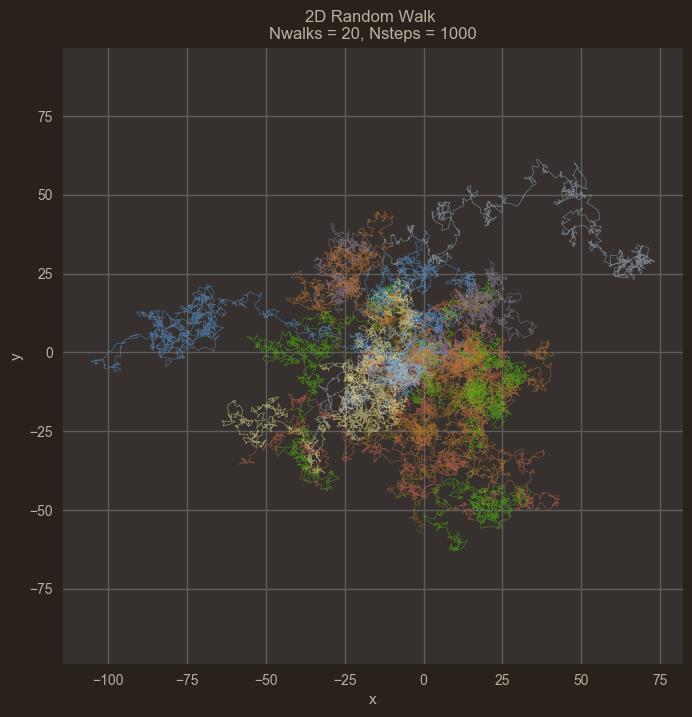

In [6]:
# random walk settings
t = 20
N = 1000

# plot settings
a = 0.5

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.axis('equal')

dat = DiffusionWalk(N,2*t)

for i in range(t):
    ix1 = 2*i
    ix2 = 2*i+1
    x, y = dat[:,ix1:(ix2+1)].transpose()
    ax.plot(x, y, alpha=a, linewidth=0.5);

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('2D Random Walk \nNwalks = %d, Nsteps = %d'%(t,N))
plt.show()

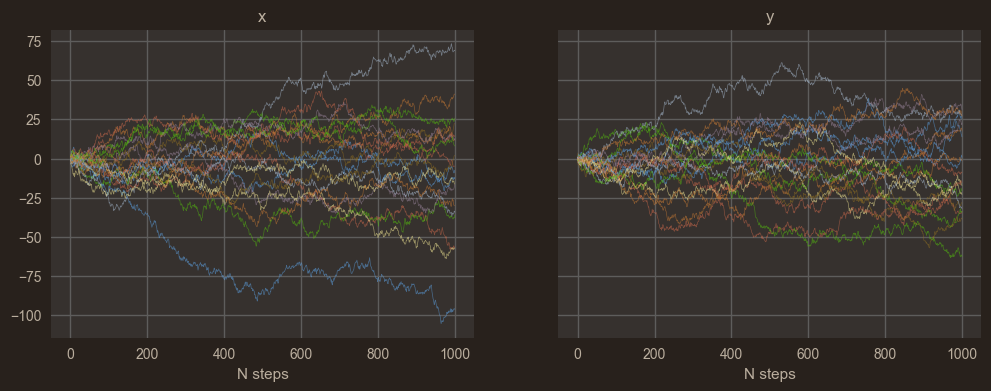

In [7]:
res = np.reshape(dat,(N,t,2))
xx = res[:,:,0]
yy = res[:,:,1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharey=True)

ax1.plot(xx, alpha=a, linewidth=0.5)
ax1.set_title('x')
ax1.set_xlabel('N steps')

ax2.plot(yy, alpha=a, linewidth=0.5)
ax2.set_title('y')
ax2.set_xlabel('N steps')

plt.show()

In [8]:
def histogram_2d(Nwalks):
    N = 100
    
    rw = DiffusionWalk(N,Nwalks*2)
    rs = rw.reshape(N,Nwalks,2)
    
    x = rs[N-1, :, 0]
    y = rs[N-1, :, 1]
    
    fig, axs = plt.subplots(1, 2, figsize=(12,4))
    
    # Left axis:
    ax = axs[0]
    
    hb = ax.hexbin(x, y, gridsize=30, cmap=cmap_2d)
    ax.set_title('Diffusion Walk: 2D Histogram \nNwalks = %d, Nsamples = %d'%(Nwalks,N))

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.colorbar(hb, ax=ax)

        
    
    ax = axs[1]
    
    xlim=2
    ylim=2
    
    # marginal condition for vertical line (red):
    # x is within +/-epsilon (near origin)
    # plotting y values
    ax.hist(y[(x<=xlim)&(x>=-xlim)], bins=20, 
            alpha=0.6, normed=True, color=red,
            label='Marginal: y|x=0')

    # marginal condition for horizontal line (blue):
    # y is within +/-epsilon (near origin)
    ax.hist(x[(y<=ylim)&(y>=-ylim)], bins=20, 
            alpha=0.6, normed=True, color=blue,
            label='Marginal: x|y=0')
    
    # analytical 1d gaussian
    sigma = np.sqrt(N)
    x = np.arange(-3.*sigma, 3.*sigma, 0.1*sigma)
    gauss = (1.0/np.sqrt(2*np.pi)/sigma) * \
            np.exp(-(x**2)/(2*sigma**2))

    ax.plot(x, gauss, '--',
        color='purple', label='Gaussian Distribution'); 
    
    ax.set_title('Diffusion Walk: Marginal Histogram \nx=0, y=0, Nwalks = %d, Nsamples = %d'%(Nwalks,N))
    plt.legend()
    plt.show()

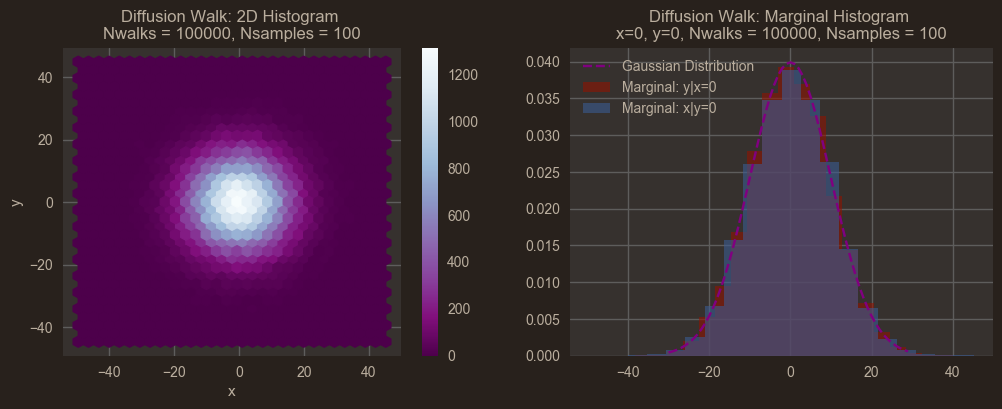

In [9]:
histogram_2d(100000)